# images.imfilter

The images.imfilter IRAF package provides an assortment of image filtering and convolution tasks.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

**Most of these notebooks rely on basic knowledge of the Astropy FITS I/O module.  If you are unfamiliar with this module please see the** [Astropy FITS I/O user documentation](http://docs.astropy.org/en/stable/io/fits/) **before using this documentation**.

Python replacements for the images.imfilter tasks can be found in the Astropy and Scipy packages.  Astropy convolution offers two convolution options, ``convolve()`` is better for small kernels, and ``convolve_fft()`` is better for larger kernels, please see the [Astropy convolution doc page](http://docs.astropy.org/en/stable/convolution/) and [Astropy Convolution How to](http://docs.astropy.org/en/stable/convolution/using.html) for more details.  For this notebook, we will use ``convolve``. Check out the list of kernels and filters avaialble for [Astropy](http://docs.astropy.org/en/stable/convolution/#module-astropy.convolution), and [Scipy](http://docs.scipy.org/doc/scipy/reference/ndimage.html)

Although ``astropy.convolution`` is built on ``scipy``, it offers several advantages:
* can handle NaN values
* improved options for boundaries
* provided built in kernels

So when possible, we will be using ``astropy.convolution`` functions in this notebook. The ability to handle NaN values allows us to replicate the behavior of the zloreject/zhireject parameter in the imfilter package.  See the [rmedian](#median-rmedian) entry for an example.

You can select from the following boundary rules in ``astropy.convolution``:
* none
* fill
* wrap
* extend

You can select from the following boundary rules in ``scipy.ndimage.convolution``:
* reflect
* constant
* nearest
* mirror
* wrap


Below we change the matplotlib colormap to ``viridis``.  This is temporarily changing the colormap setting in the matplotlib rc file.


**Important Note to Users:**
There are some differences in algorithms between some of the IRAF and Python Interpolations.  Proceed with care if you are comparing prior IRAF results to Python results.  For more details on this issue see the [filed Github issue](https://github.com/spacetelescope/stak-notebooks/issues/75).

Contents:

* [boxcar](#boxcar)
* [covolve](#convolve)
* [gauss](#gauss)
* [laplace](#laplace)
* [median-rmedian](#median-rmedian)
* [mode-rmode](#mode-rmode)

In [1]:
# Temporarily change default colormap to viridis
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'

<br>

<br>

<a id='boxcar'></a>

## boxcar

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The boxcar convolution does a boxcar smoothing with a given box size, and applies this running average to an array.  Here we show a 2-D example using ``Box2DKernel``, which is convinient for square box sizes.

In [2]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [4]:
# grab subsection of fits images
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our kernel
box_kernel = Box2DKernel(3)
# perform convolution
result = ap_convolve(my_arr, box_kernel, normalize_kernel=True)

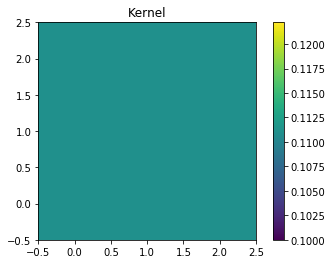

In [5]:
plt.imshow(box_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

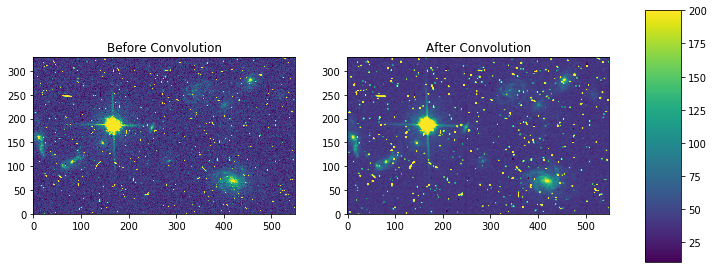

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='convolve'></a>

## convolve

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The convolve task allows you to convolve your data array with a kernel of your own creation.  Here we show a simple example of a rectangular kernel applied to a 10 by 10 array using the ``astropy.convolution.convolve`` function

In [7]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [9]:
# grab subsection of fits images
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[840:950,2350:2500]

# add nan's to test array
my_arr[40:50,60:70] = np.nan
my_arr[70:73,110:113] = np.nan

# setup our custom kernel
my_kernel = [[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]
# perform convolution
result = ap_convolve(my_arr, my_kernel, normalize_kernel=True, boundary='wrap')

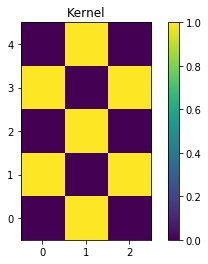

In [10]:
plt.imshow(my_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

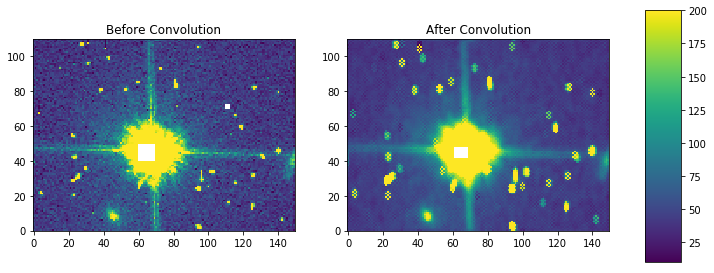

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

Here is an example using masking with ``scipy.convolve``

In [12]:
# Standard Imports
import numpy as np
from scipy.ndimage import convolve as sp_convolve

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# grab subsection of fits images
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our custom kernel
my_kernel = np.array([[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]) * (1/7.0)
# perform convolution
result = sp_convolve(my_arr, my_kernel, mode='wrap')

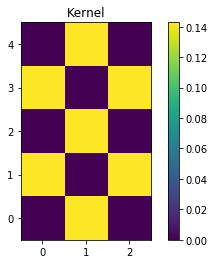

In [14]:
plt.imshow(my_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

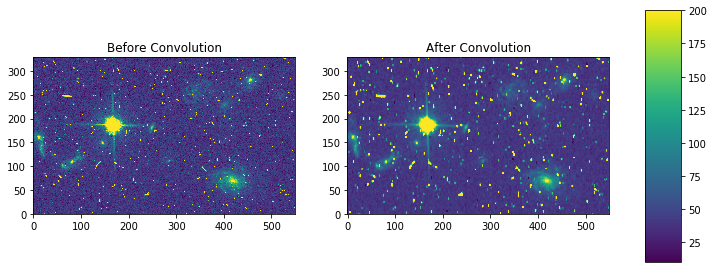

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='gauss'></a>

## gauss

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The gaussian kernel convolution applies a gaussian function convolution to your data array.  The [Gaussian2DKernel](http://docs.astropy.org/en/stable/api/astropy.convolution.Gaussian2DKernel.html#astropy.convolution.Gaussian2DKernel) size is defined slightly differently from the IRAF version.

In [16]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Gaussian2DKernel
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [18]:
# grab subsection of fits images
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our kernel, with 6 sigma and a 3 in x by 5 in y size
gauss_kernel = Gaussian2DKernel(6, x_size=5, y_size=7)
# perform convolution
result = ap_convolve(my_arr, gauss_kernel, normalize_kernel=True)

gauss_kernel

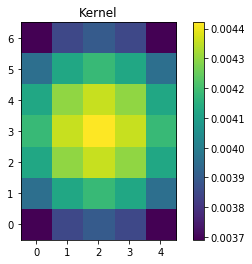

In [19]:
plt.imshow(gauss_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

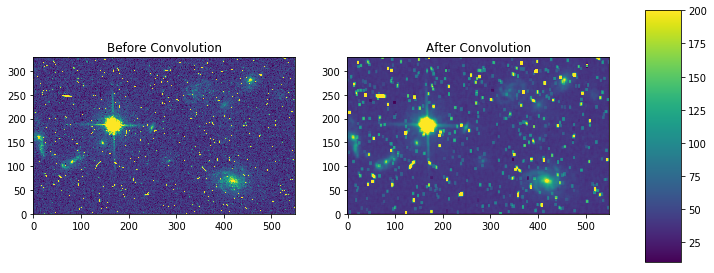

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='laplace'></a>

## laplace

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The laplace task runs a image convolution using a laplacian filter with a subset of footprints.  For the `scipy.ndimage.filter.laplace` function we will be using, you can feed any footprint in as an array to create your kernel.

In [21]:
# Standard Imports
import numpy as np
from scipy.ndimage import convolve as sp_convolve
from scipy.ndimage import laplace

# Astronomy Specific Imports
from astropy.io import fits
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [23]:
# grab subsection of fits images
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our laplace kernel with a target footprint (diagonals in IRAF)
footprint = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
laplace_kernel = laplace(footprint)
# perform scipy convolution
result = sp_convolve(my_arr, laplace_kernel)

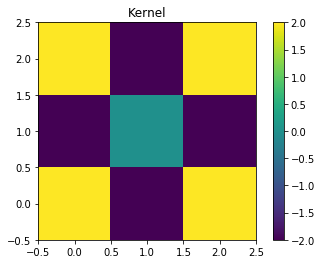

In [24]:
plt.imshow(laplace_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

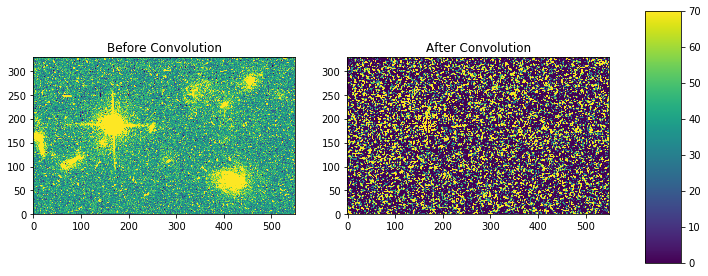

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=70)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=70)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='median-rmedian'></a>

## median-rmedian

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Apply a median filter to your data array, and save the smoothed image back out to a FITS file.  We will use the ``scipy.ndimage.filters.median_filter`` function.

In [26]:
# Standard Imports
import numpy as np
from scipy.ndimage.filters import median_filter

# Astronomy Specific Imports
from astropy.io import fits
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [28]:
# create test array
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
out_file = 'median_out.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# apply median filter
filtered = median_filter(my_arr,size=(3,4))

In [29]:
# save smoothed image to a new FITS file
hdu = fits.PrimaryHDU(filtered)
hdu.writeto(out_file, overwrite=True)

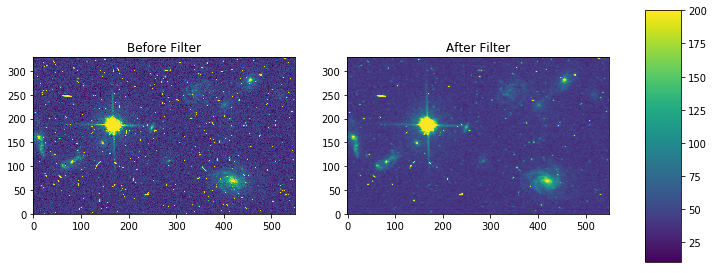

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

For a ring median filter we can supply a more specific footprint to the ``median_filter`` function.  You can easily generate this footprint using the ``astropy.convolution`` library. In this example we will also show how to use the equivalent of the IRAF zloreject/zhireject parameter.  The handling of `numpy` `nan` values is only available with the `Astropy` convolution.

In [32]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Ring2DKernel

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# create test array
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# create ring filter
ringKernel = Ring2DKernel(10,5)

# apply a zloreject value by setting certain values to numpy nan
my_arr[my_arr < -99] = np.nan

# apply median filter
filtered = ap_convolve(my_arr, ringKernel, normalize_kernel=True)

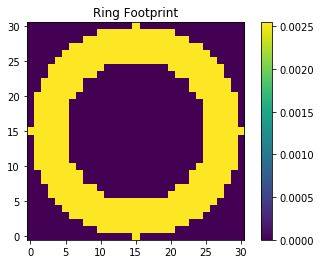

In [34]:
plt.imshow(ringKernel, interpolation='none', origin='lower')
plt.title('Ring Footprint')
plt.colorbar()
plt.show()

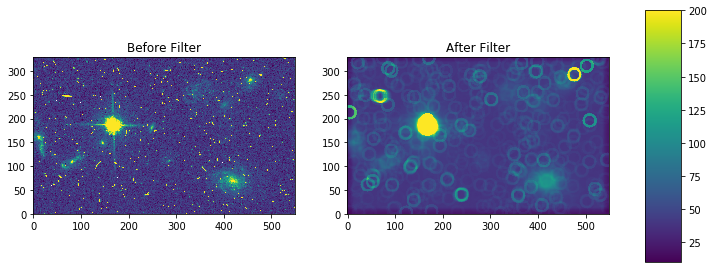

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='mode-rmode'></a>

##  mode-rmode

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The mode calculation equation used in the mode and rmode IRAF tasks (3.0\*median - 2.0\*mean) can be recreated using the [scipy.ndimage.generic_filter function](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.ndimage.generic_filter.html). The equation was used as an approximation for a mode calculation.

In [36]:
# Standard Imports
import numpy as np
from scipy.ndimage import generic_filter

# Astronomy Specific Imports
from astropy.io import fits
from astroquery.mast import Observations

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Download test file using astroquery, this only needs to be run once
# and can be skipped if using your own data.
# Astroquery will only download file if not already present.
obsid = '2004663553'
Observations.download_products(obsid,productFilename="jczgx1ppq_flc.fits")

INFO: Found cached file ./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits with expected size 167964480. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits,COMPLETE,None,None


In [38]:
def mode_func(in_arr):
    f = 3.0*np.median(in_arr) - 2.0*np.mean(in_arr)
    return f

For a box footprint:

In [39]:
# create test array
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# apply mode filter
filtered = generic_filter(my_arr, mode_func, size=5)

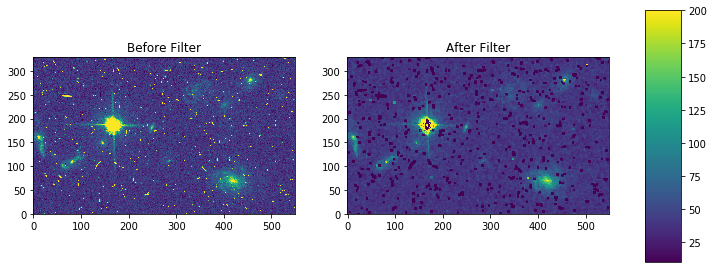

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

For a ring footprint (similar to IRAF's rmode):

In [41]:
# Standard Imports
import numpy as np
from scipy.ndimage import generic_filter

# Astronomy Specific Imports
from astropy.io import fits
from astroimtools import circular_annulus_footprint

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# create test array
test_data = './mastDownload/HST/JCZGX1PPQ/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# create annulus filter
fp = circular_annulus_footprint(5, 9)
# apply mode filter
filtered = generic_filter(my_arr, mode_func, footprint=fp)

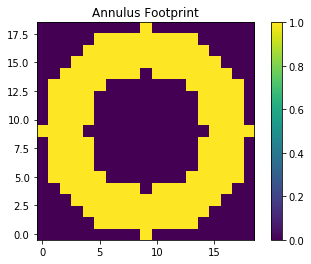

In [43]:
plt.imshow(fp, interpolation='none', origin='lower')
plt.title('Annulus Footprint')
plt.colorbar()
plt.show()

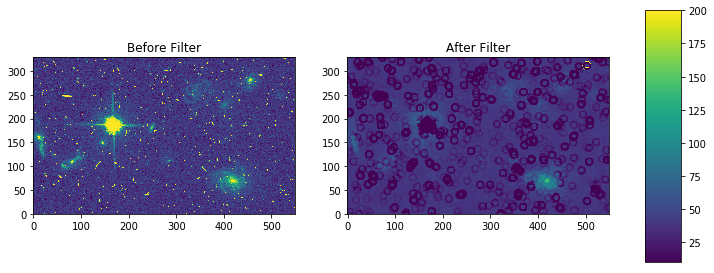

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<br>

## Not Replacing

* runmed - see **images.imutil.imsum**
* fmode - see [images.imfilter.mode](#mode-rmode)
* fmedian - see [images.imfilter.median](#median-rmedian)
* gradient - **may** replace in future